# $U(1)$ Gauge Model using L2HMC in graph mode

--------------------------------------------------------------------
### TODO:
* [ ] Look at performance on Cooley (longer training runs).
* [ ] Fit observables to Eq. \ref{eq:therm_time} to determine the thermalization time $\tau$.

\begin{equation} 
f(t) \equiv A \exp^{-t / \tau}+ \,\, B
\label{eq:therm_time}
\end{equation}
* [ ] Look at defining a distance metric as the difference in topological charge between two samples and see what effect adding this as an additional term to the loss function has on the models' ability to tunnel between topological sectors.

--------------------------------------------------------------------

In [1]:
import os
import sys
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.special import i0, i1

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import utils.gauge_model_helpers as helpers
from utils.data_utils import (
    calc_avg_vals_errors, block_resampling, jackknife_err
)
from gauge_model import (
    GaugeModel, check_else_make_dir, save_params_to_pkl_file
)

tfe = tf.contrib.eager
%autoreload 2
%matplotlib notebook

#from gauge_model import GaugeModel
#%reload_ext gauge_model.GaugeModel
#from gauge_model import GaugeModel
#
#from dynamics.gauge_dynamics import GaugeDynamics
#%reload_ext dynamics.gauge_dynamics
#from dynamics.gauge_dynamics import GaugeDynamics

## Define parameters

In [2]:
params = {
#--------------------- Lattice parameters ----------------------------
    'time_size': 16,
    'space_size': 16,
    'link_type': 'U1',
    'dim': 2,
    'num_samples': 4,
    'rand': False,
    'data_format': 'channels_first',
#--------------------- Leapfrog parameters ---------------------------
    'num_steps': 2,
    'eps': 0.2,
    'loss_scale': 0.1,
    'loss_eps': 1e-4,
#--------------------- Learning rate parameters ----------------------
    'learning_rate_init': 1e-3,
    'learning_rate_decay_steps': 500,
    'learning_rate_decay_rate': 0.96,
#--------------------- Annealing rate parameters ---------------------
    'annealing': True,
    'annealing_steps': 500,
    'annealing_factor': 0.9999,
    #'beta': 3.,
    'beta_init': 3.,
    'beta_final': 8.,
#--------------------- Training parameters ---------------------------
    'train_steps': 20000,
    'save_steps': 1000,
    'logging_steps': 50,
    'training_samples_steps': 1000,
    'training_samples_length': 100,
#--------------------- Model parameters ------------------------------
    'conv_net': True,
    'hmc': False,
    'eps_trainable': True,
    'metric': 'l2',
    'aux': True,
    'clip_grads': False,
    'clip_value': 10.,
}

## Create model

In [3]:
#os.environ["KMP_BLOCKTIME"] = str(0)
#os.environ["KMP_SETTINGS"] = str(1)
#os.environ["KMP_AFFINITY"] = "granularity=fine,verbose,compact,1,0"
#os.environ["OMP_NUM_THREADS"] = str(2)

config = tf.ConfigProto()
tf.reset_default_graph()

In [ ]:
model = GaugeModel(params=params, 
                   config=config,
                   sess=None,
                   log_dir=None,
                   restore=False)

save_params_to_pkl_file(params, model.info_dir)

Creating directory for new run: /Users/saforem2/ANL/l2hmc/gauge_logs_graph/run_84/
Creating directory: /Users/saforem2/ANL/l2hmc/gauge_logs_graph/run_84/samples_history.
Creating directory: /Users/saforem2/ANL/l2hmc/gauge_logs_graph/run_84/samples_history/training.
Creating directory: /Users/saforem2/ANL/l2hmc/gauge_logs_graph/run_84/train_samples.
time_size: 16
space_size: 16
link_type: U1
dim: 2
num_samples: 4
rand: False
data_format: channels_first
num_steps: 2
eps: 0.2
loss_scale: 0.1
loss_eps: 0.0001
learning_rate_init: 0.001
learning_rate_decay_steps: 500
learning_rate_decay_rate: 0.96
annealing: True
annealing_steps: 500
annealing_factor: 0.9999
beta_init: 3.0
beta_final: 8.0
train_steps: 20000
save_steps: 1000
logging_steps: 50
training_samples_steps: 1000
training_samples_length: 100
conv_net: True
hmc: False
eps_trainable: True
metric: l2
aux: True
clip_grads: False
clip_value: 10.0
--------------------------------------------------------------------------------

Building gra

In [ ]:
model.train(model.train_steps, kill_sess=False)

----------------------------------------------------------------------------------------------------
     STEP           LOSS       TIME/STEP      ACCEPT %        EPS           BETA           LR      
----------------------------------------------------------------------------------------------------


In [6]:
run_steps = [50, 100, 200, 400, 500, 600, 800, 1000, 2000, 4000, 5000, 10000]#, 6000#, 10000]

In [7]:
for steps in run_steps:
    _ = model.run(steps)

Running (trained) L2HMC sampler for 50 steps...
step:      0/50     accept prob (avg):     1     step size: 0.06523 	 time/step: 0.3889

accept prob:  [1. 1. 1. 1.]


step:     10/50     accept prob (avg):     1     step size: 0.06523 	 time/step: 0.1802

accept prob:  [1. 1. 1. 1.]


step:     20/50     accept prob (avg):     1     step size: 0.06523 	 time/step: 0.1169

accept prob:  [1. 1. 1. 1.]


step:     30/50     accept prob (avg):  0.9441   step size: 0.06523 	 time/step: 0.103 

accept prob:  [0.79248947 1.         1.         0.9838641 ]


step:     40/50     accept prob (avg):  0.7435   step size: 0.06523 	 time/step: 0.1087

accept prob:  [1.         1.         0.4872875  0.48654297]



Samples saved to: /Users/saforem2/ANL/l2hmc/gauge_logs_graph/run_82/samples_history/samples_history_50.pkl.
Accept probabilities saved to: /Users/saforem2/ANL/l2hmc/gauge_logs_graph/run_82/samples_history/accept_prob_history_50.pkl.

 Time to complete run: 6.5993311405181885 seconds.
-------

step:    140/400    accept prob (avg):   0.879   step size: 0.06523 	 time/step: 0.1022

accept prob:  [1.         1.         0.7006535  0.81537825]


step:    150/400    accept prob (avg):  0.8202   step size: 0.06523 	 time/step: 0.08945

accept prob:  [0.9350385 0.4898819 0.8559706 1.       ]


step:    160/400    accept prob (avg):  0.8467   step size: 0.06523 	 time/step: 0.0918

accept prob:  [1.        0.992159  1.        0.3946764]


step:    170/400    accept prob (avg):  0.7421   step size: 0.06523 	 time/step: 0.09838

accept prob:  [0.60348517 1.         0.6251531  0.7397404 ]


step:    180/400    accept prob (avg):  0.9132   step size: 0.06523 	 time/step: 0.1362

accept prob:  [0.9786237  1.         0.67424166 1.        ]


step:    190/400    accept prob (avg):  0.9621   step size: 0.06523 	 time/step: 0.1909

accept prob:  [1.        0.8482992 1.        1.       ]


step:    200/400    accept prob (avg):  0.8538   step size: 0.06523 	 time/step: 0.09914

accept prob:  

step:    280/500    accept prob (avg):  0.9949   step size: 0.06523 	 time/step: 0.1018

accept prob:  [1.        0.9794304 1.        1.       ]


step:    290/500    accept prob (avg):  0.8682   step size: 0.06523 	 time/step: 0.1239

accept prob:  [1.        0.8120285 1.        0.6606179]


step:    300/500    accept prob (avg):  0.7402   step size: 0.06523 	 time/step: 0.1145

accept prob:  [0.66401356 1.         0.5247315  0.7720106 ]


step:    310/500    accept prob (avg):  0.9578   step size: 0.06523 	 time/step: 0.1042

accept prob:  [0.83120644 1.         1.         1.        ]


step:    320/500    accept prob (avg):  0.8665   step size: 0.06523 	 time/step: 0.1071

accept prob:  [0.94981813 1.         0.51634413 1.        ]


step:    330/500    accept prob (avg):  0.8824   step size: 0.06523 	 time/step: 0.1062

accept prob:  [0.8174462  1.         1.         0.71216285]


step:    340/500    accept prob (avg):  0.8693   step size: 0.06523 	 time/step: 0.09499

accept prob:

step:    320/600    accept prob (avg):  0.8567   step size: 0.06523 	 time/step: 0.09841

accept prob:  [0.8577778  1.         1.         0.56907123]


step:    330/600    accept prob (avg):  0.9893   step size: 0.06523 	 time/step: 0.09535

accept prob:  [0.95729995 1.         1.         1.        ]


step:    340/600    accept prob (avg):   0.845   step size: 0.06523 	 time/step: 0.107 

accept prob:  [0.8155302  0.9174291  0.64710927 1.        ]


step:    350/600    accept prob (avg):  0.8505   step size: 0.06523 	 time/step: 0.101 

accept prob:  [1.         1.         0.68483853 0.7170041 ]


step:    360/600    accept prob (avg):  0.7936   step size: 0.06523 	 time/step: 0.1082

accept prob:  [0.7280976  0.63982195 0.8064719  1.        ]


step:    370/600    accept prob (avg):  0.7989   step size: 0.06523 	 time/step: 0.1038

accept prob:  [0.88497955 1.         0.31078878 1.        ]


step:    380/600    accept prob (avg):  0.9344   step size: 0.06523 	 time/step: 0.1079

acc

step:    250/800    accept prob (avg):  0.8682   step size: 0.06523 	 time/step: 0.1066

accept prob:  [0.4728129 1.        1.        1.       ]


step:    260/800    accept prob (avg):   0.857   step size: 0.06523 	 time/step: 0.1275

accept prob:  [0.67073447 1.         0.7574021  1.        ]


step:    270/800    accept prob (avg):  0.7304   step size: 0.06523 	 time/step: 0.1052

accept prob:  [0.84421873 1.         0.44912952 0.6280809 ]


step:    280/800    accept prob (avg):  0.8045   step size: 0.06523 	 time/step: 0.1297

accept prob:  [0.7492638 0.687689  0.7811347 1.       ]


step:    290/800    accept prob (avg):   0.69    step size: 0.06523 	 time/step: 0.1123

accept prob:  [0.79921705 0.72210085 0.5035541  0.7351306 ]


step:    300/800    accept prob (avg):  0.7302   step size: 0.06523 	 time/step: 0.1275

accept prob:  [0.78328055 0.837345   0.5708436  0.7291872 ]


step:    310/800    accept prob (avg):  0.7943   step size: 0.06523 	 time/step: 0.1344

accept prob: 


Samples saved to: /Users/saforem2/ANL/l2hmc/gauge_logs_graph/run_82/samples_history/samples_history_800.pkl.
Accept probabilities saved to: /Users/saforem2/ANL/l2hmc/gauge_logs_graph/run_82/samples_history/accept_prob_history_800.pkl.

 Time to complete run: 93.5311369895935 seconds.
--------------------------------------------------------------------------------

Running (trained) L2HMC sampler for 1000 steps...
step:      0/1000   accept prob (avg):     1     step size: 0.06523 	 time/step: 0.1012

accept prob:  [1. 1. 1. 1.]


step:     10/1000   accept prob (avg):     1     step size: 0.06523 	 time/step: 0.1043

accept prob:  [1. 1. 1. 1.]


step:     20/1000   accept prob (avg):     1     step size: 0.06523 	 time/step: 0.116 

accept prob:  [1. 1. 1. 1.]


step:     30/1000   accept prob (avg):     1     step size: 0.06523 	 time/step: 0.09992

accept prob:  [1. 1. 1. 1.]


step:     40/1000   accept prob (avg):   0.981   step size: 0.06523 	 time/step: 0.1026

accept prob:  [1

step:    540/1000   accept prob (avg):  0.7389   step size: 0.06523 	 time/step: 0.1031

accept prob:  [0.59121704 0.7059764  0.6582834  1.        ]


step:    550/1000   accept prob (avg):   0.758   step size: 0.06523 	 time/step: 0.09485

accept prob:  [0.9135426 0.7174004 0.4009541 1.       ]


step:    560/1000   accept prob (avg):  0.8113   step size: 0.06523 	 time/step: 0.1079

accept prob:  [1.         0.75451595 0.490615   1.        ]


step:    570/1000   accept prob (avg):   0.973   step size: 0.06523 	 time/step: 0.101 

accept prob:  [1.        1.        0.8921626 1.       ]


step:    580/1000   accept prob (avg):  0.8881   step size: 0.06523 	 time/step: 0.1012

accept prob:  [0.6534177  1.         0.89894044 1.        ]


step:    590/1000   accept prob (avg):  0.9067   step size: 0.06523 	 time/step: 0.1102

accept prob:  [1.        0.96737   1.        0.6592664]


step:    600/1000   accept prob (avg):  0.8577   step size: 0.06523 	 time/step: 0.1097

accept prob:  [1

step:     70/2000   accept prob (avg):  0.9006   step size: 0.06523 	 time/step: 0.09653

accept prob:  [1.         0.60226893 1.         1.        ]


step:     80/2000   accept prob (avg):     1     step size: 0.06523 	 time/step: 0.1246

accept prob:  [1. 1. 1. 1.]


step:     90/2000   accept prob (avg):  0.8579   step size: 0.06523 	 time/step: 0.1345

accept prob:  [0.8431144  1.         1.         0.58847904]


step:    100/2000   accept prob (avg):  0.7315   step size: 0.06523 	 time/step: 0.1365

accept prob:  [0.8277132  0.7726706  0.46982265 0.85589504]


step:    110/2000   accept prob (avg):  0.8577   step size: 0.06523 	 time/step: 0.1522

accept prob:  [1.        0.4306587 1.        1.       ]


step:    120/2000   accept prob (avg):     1     step size: 0.06523 	 time/step: 0.112 

accept prob:  [1. 1. 1. 1.]


step:    130/2000   accept prob (avg):  0.7134   step size: 0.06523 	 time/step: 0.1044

accept prob:  [0.7278509  0.7156924  0.63414574 0.7758368 ]


step:    1

step:    640/2000   accept prob (avg):  0.7055   step size: 0.06523 	 time/step: 0.1104

accept prob:  [0.8535447  0.52988267 1.         0.43840423]


step:    650/2000   accept prob (avg):  0.8009   step size: 0.06523 	 time/step: 0.1137

accept prob:  [0.7503597 0.6977067 1.        0.7556014]


step:    660/2000   accept prob (avg):  0.7112   step size: 0.06523 	 time/step: 0.101 

accept prob:  [0.35132295 1.         0.9923072  0.501239  ]


step:    670/2000   accept prob (avg):  0.9481   step size: 0.06523 	 time/step: 0.1002

accept prob:  [1.         0.79251623 1.         1.        ]


step:    680/2000   accept prob (avg):  0.8233   step size: 0.06523 	 time/step: 0.105 

accept prob:  [0.33291024 1.         0.9940045  0.9663078 ]


step:    690/2000   accept prob (avg):  0.8683   step size: 0.06523 	 time/step: 0.1139

accept prob:  [0.7530437 1.        1.        0.7202938]


step:    700/2000   accept prob (avg):  0.9631   step size: 0.06523 	 time/step: 0.1013

accept prob: 

step:   1190/2000   accept prob (avg):  0.9759   step size: 0.06523 	 time/step: 0.1137

accept prob:  [0.947531  1.        1.        0.9558695]


step:   1200/2000   accept prob (avg):   0.974   step size: 0.06523 	 time/step: 0.1135

accept prob:  [1.        1.        0.8960919 1.       ]


step:   1210/2000   accept prob (avg):  0.8209   step size: 0.06523 	 time/step: 0.09793

accept prob:  [0.73676777 0.9649554  1.         0.58183604]


step:   1220/2000   accept prob (avg):  0.7872   step size: 0.06523 	 time/step: 0.1098

accept prob:  [1.         0.7387965  0.6111209  0.79875636]


step:   1230/2000   accept prob (avg):  0.7462   step size: 0.06523 	 time/step: 0.1126

accept prob:  [0.6065852  0.69329196 0.68479896 1.        ]


step:   1240/2000   accept prob (avg):  0.8894   step size: 0.06523 	 time/step: 0.1065

accept prob:  [1.        1.        0.5576218 1.       ]


step:   1250/2000   accept prob (avg):  0.9485   step size: 0.06523 	 time/step: 0.122 

accept prob:  [1

step:   1740/2000   accept prob (avg):  0.7501   step size: 0.06523 	 time/step: 0.1292

accept prob:  [0.8640278  0.45815557 0.9540886  0.7240427 ]


step:   1750/2000   accept prob (avg):  0.7794   step size: 0.06523 	 time/step: 0.1177

accept prob:  [1.         0.6233643  0.49441767 1.        ]


step:   1760/2000   accept prob (avg):  0.9497   step size: 0.06523 	 time/step: 0.1247

accept prob:  [1.        0.7989976 1.        1.       ]


step:   1770/2000   accept prob (avg):   0.89    step size: 0.06523 	 time/step: 0.1214

accept prob:  [1.         1.         0.56014425 1.        ]


step:   1780/2000   accept prob (avg):  0.8851   step size: 0.06523 	 time/step: 0.1603

accept prob:  [0.8382883  0.9288355  0.77323425 1.        ]


step:   1790/2000   accept prob (avg):  0.9445   step size: 0.06523 	 time/step: 0.09476

accept prob:  [0.7778994 1.        1.        1.       ]


step:   1800/2000   accept prob (avg):  0.7659   step size: 0.06523 	 time/step: 0.09948

accept prob

step:    280/4000   accept prob (avg):   0.675   step size: 0.06523 	 time/step: 0.1098

accept prob:  [0.42675996 0.4811697  0.7921026  1.        ]


step:    290/4000   accept prob (avg):  0.7677   step size: 0.06523 	 time/step: 0.1383

accept prob:  [1.         0.64226943 0.8229026  0.6055884 ]


step:    300/4000   accept prob (avg):  0.9272   step size: 0.06523 	 time/step: 0.1385

accept prob:  [1.        0.7086963 1.        1.       ]


step:    310/4000   accept prob (avg):  0.9695   step size: 0.06523 	 time/step: 0.1357

accept prob:  [0.877929 1.       1.       1.      ]


step:    320/4000   accept prob (avg):  0.8107   step size: 0.06523 	 time/step: 0.1734

accept prob:  [0.96902466 1.         0.43200135 0.8419032 ]


step:    330/4000   accept prob (avg):     1     step size: 0.06523 	 time/step: 0.09032

accept prob:  [1. 1. 1. 1.]


step:    340/4000   accept prob (avg):     1     step size: 0.06523 	 time/step: 0.1599

accept prob:  [1. 1. 1. 1.]


step:    350/4000 

step:    840/4000   accept prob (avg):  0.8758   step size: 0.06523 	 time/step: 0.1039

accept prob:  [1.         0.50315315 1.         1.        ]


step:    850/4000   accept prob (avg):  0.8796   step size: 0.06523 	 time/step: 0.1032

accept prob:  [0.5184916 1.        1.        1.       ]


step:    860/4000   accept prob (avg):  0.8707   step size: 0.06523 	 time/step: 0.09673

accept prob:  [0.48291874 1.         1.         1.        ]


step:    870/4000   accept prob (avg):  0.7078   step size: 0.06523 	 time/step: 0.1016

accept prob:  [0.5962341  1.         0.61123276 0.6235927 ]


step:    880/4000   accept prob (avg):  0.8567   step size: 0.06523 	 time/step: 0.1012

accept prob:  [0.4421785  1.         0.98476845 1.        ]


step:    890/4000   accept prob (avg):  0.8861   step size: 0.06523 	 time/step: 0.1041

accept prob:  [1.        0.5443704 1.        1.       ]


step:    900/4000   accept prob (avg):  0.6617   step size: 0.06523 	 time/step: 0.1022

accept prob:

step:   1390/4000   accept prob (avg):  0.7201   step size: 0.06523 	 time/step: 0.1018

accept prob:  [0.8680981  0.6947321  0.6439552  0.67354465]


step:   1400/4000   accept prob (avg):  0.8605   step size: 0.06523 	 time/step: 0.1079

accept prob:  [1.         1.         1.         0.44213945]


step:   1410/4000   accept prob (avg):  0.9017   step size: 0.06523 	 time/step: 0.08862

accept prob:  [0.6066983 1.        1.        1.       ]


step:   1420/4000   accept prob (avg):  0.8488   step size: 0.06523 	 time/step: 0.08968

accept prob:  [0.7359363  0.65922827 1.         1.        ]


step:   1430/4000   accept prob (avg):  0.9464   step size: 0.06523 	 time/step: 0.08759

accept prob:  [1.         1.         1.         0.78553075]


step:   1440/4000   accept prob (avg):   0.852   step size: 0.06523 	 time/step: 0.1111

accept prob:  [1.        0.76579   0.9761512 0.6662035]


step:   1450/4000   accept prob (avg):  0.7723   step size: 0.06523 	 time/step: 0.1027

accept pro

step:   1950/4000   accept prob (avg):  0.6775   step size: 0.06523 	 time/step: 0.09442

accept prob:  [0.48931414 1.         0.8023722  0.41816232]


step:   1960/4000   accept prob (avg):  0.7928   step size: 0.06523 	 time/step: 0.105 

accept prob:  [1.         0.90419847 0.7173347  0.5498636 ]


step:   1970/4000   accept prob (avg):  0.9639   step size: 0.06523 	 time/step: 0.09801

accept prob:  [1.        1.        0.8554772 1.       ]


step:   1980/4000   accept prob (avg):  0.7159   step size: 0.06523 	 time/step: 0.1034

accept prob:  [0.56249106 0.5772377  1.         0.72393227]


step:   1990/4000   accept prob (avg):  0.6638   step size: 0.06523 	 time/step: 0.1003

accept prob:  [0.79457206 0.8799407  0.640117   0.34070098]


step:   2000/4000   accept prob (avg):  0.9765   step size: 0.06523 	 time/step: 0.09997

accept prob:  [1.         1.         1.         0.90588325]


step:   2010/4000   accept prob (avg):   0.819   step size: 0.06523 	 time/step:  0.11 

accept

step:   2500/4000   accept prob (avg):  0.8345   step size: 0.06523 	 time/step: 0.1443

accept prob:  [0.7994122  0.88919985 0.74679595 0.9025719 ]


step:   2510/4000   accept prob (avg):  0.8297   step size: 0.06523 	 time/step: 0.1006

accept prob:  [0.75173736 0.5671277  1.         1.        ]


step:   2520/4000   accept prob (avg):  0.7846   step size: 0.06523 	 time/step: 0.09702

accept prob:  [1.         0.9436672  0.48358238 0.71107703]


step:   2530/4000   accept prob (avg):  0.8454   step size: 0.06523 	 time/step: 0.09774

accept prob:  [0.60534817 0.77637905 1.         1.        ]


step:   2540/4000   accept prob (avg):  0.9283   step size: 0.06523 	 time/step: 0.09399

accept prob:  [0.9312226 0.8927618 0.8890371 1.       ]


step:   2550/4000   accept prob (avg):  0.7993   step size: 0.06523 	 time/step: 0.1091

accept prob:  [0.87216085 0.5157457  0.8094527  1.        ]


step:   2560/4000   accept prob (avg):  0.8141   step size: 0.06523 	 time/step: 0.1035

accept

step:   3060/4000   accept prob (avg):  0.8602   step size: 0.06523 	 time/step: 0.1012

accept prob:  [1.        1.        0.4407115 1.       ]


step:   3070/4000   accept prob (avg):  0.9297   step size: 0.06523 	 time/step: 0.09961

accept prob:  [0.71862745 1.         1.         1.        ]


step:   3080/4000   accept prob (avg):  0.8131   step size: 0.06523 	 time/step: 0.09869

accept prob:  [1.         1.         0.25223118 1.        ]


step:   3090/4000   accept prob (avg):  0.8984   step size: 0.06523 	 time/step: 0.09967

accept prob:  [0.9832938  1.         0.8882777  0.72214496]


step:   3100/4000   accept prob (avg):  0.7616   step size: 0.06523 	 time/step: 0.09904

accept prob:  [0.91340625 0.4287848  1.         0.7042549 ]


step:   3110/4000   accept prob (avg):  0.8406   step size: 0.06523 	 time/step: 0.09348

accept prob:  [0.7629699 1.        0.599447  1.       ]


step:   3120/4000   accept prob (avg):  0.9139   step size: 0.06523 	 time/step: 0.102 

accept p

step:   3620/4000   accept prob (avg):  0.8027   step size: 0.06523 	 time/step: 0.1039

accept prob:  [0.65182436 1.         0.84303445 0.7159764 ]


step:   3630/4000   accept prob (avg):  0.8796   step size: 0.06523 	 time/step: 0.09701

accept prob:  [1.         0.64313036 0.875147   1.        ]


step:   3640/4000   accept prob (avg):  0.8661   step size: 0.06523 	 time/step: 0.1226

accept prob:  [1.        0.9018285 0.5625444 1.       ]


step:   3650/4000   accept prob (avg):  0.9116   step size: 0.06523 	 time/step: 0.1089

accept prob:  [0.64649737 1.         1.         1.        ]


step:   3660/4000   accept prob (avg):  0.9368   step size: 0.06523 	 time/step:  0.17 

accept prob:  [1.         1.         1.         0.74732274]


step:   3670/4000   accept prob (avg):  0.8701   step size: 0.06523 	 time/step: 0.1008

accept prob:  [1.         0.83453876 0.6458072  1.        ]


step:   3680/4000   accept prob (avg):  0.8845   step size: 0.06523 	 time/step: 0.1119

accept p

step:    160/5000   accept prob (avg):  0.7819   step size: 0.06523 	 time/step: 0.1012

accept prob:  [0.46505812 0.71715957 1.         0.9455667 ]


step:    170/5000   accept prob (avg):  0.8737   step size: 0.06523 	 time/step: 0.1042

accept prob:  [0.53774923 0.9568879  1.         1.        ]


step:    180/5000   accept prob (avg):   0.76    step size: 0.06523 	 time/step: 0.1283

accept prob:  [0.8069863 0.6145621 0.6185699 1.       ]


step:    190/5000   accept prob (avg):  0.9339   step size: 0.06523 	 time/step: 0.09871

accept prob:  [1.         1.         0.73544234 1.        ]


step:    200/5000   accept prob (avg):  0.6445   step size: 0.06523 	 time/step: 0.1147

accept prob:  [0.87479985 0.63451356 0.62366676 0.44483128]


step:    210/5000   accept prob (avg):  0.9608   step size: 0.06523 	 time/step: 0.1064

accept prob:  [1.         0.8623184  0.98083943 1.        ]


step:    220/5000   accept prob (avg):  0.7533   step size: 0.06523 	 time/step: 0.1011

accept p

step:    720/5000   accept prob (avg):  0.9509   step size: 0.06523 	 time/step: 0.1023

accept prob:  [0.80376655 1.         1.         1.        ]


step:    730/5000   accept prob (avg):  0.9694   step size: 0.06523 	 time/step: 0.1071

accept prob:  [0.8776103 1.        1.        1.       ]


step:    740/5000   accept prob (avg):  0.9415   step size: 0.06523 	 time/step: 0.1139

accept prob:  [0.76600033 1.         1.         1.        ]


step:    750/5000   accept prob (avg):  0.7948   step size: 0.06523 	 time/step: 0.09822

accept prob:  [0.7569169 1.        1.        0.4221615]


step:    760/5000   accept prob (avg):  0.7987   step size: 0.06523 	 time/step: 0.1093

accept prob:  [0.6053851 0.7704337 0.9553706 0.8637143]


step:    770/5000   accept prob (avg):  0.7763   step size: 0.06523 	 time/step: 0.1119

accept prob:  [0.45346785 0.933328   0.71845204 1.        ]


step:    780/5000   accept prob (avg):  0.9119   step size: 0.06523 	 time/step: 0.106 

accept prob:  [0

step:   1280/5000   accept prob (avg):  0.8592   step size: 0.06523 	 time/step: 0.1017

accept prob:  [0.43694693 1.         1.         1.        ]


step:   1290/5000   accept prob (avg):  0.7113   step size: 0.06523 	 time/step: 0.1217

accept prob:  [1.         0.327459   0.85427713 0.6634645 ]


step:   1300/5000   accept prob (avg):  0.8923   step size: 0.06523 	 time/step: 0.1159

accept prob:  [1.        0.6738736 0.8955207 1.       ]


step:   1310/5000   accept prob (avg):  0.9195   step size: 0.06523 	 time/step: 0.112 

accept prob:  [1.        1.        0.6780797 1.       ]


step:   1320/5000   accept prob (avg):  0.8755   step size: 0.06523 	 time/step: 0.1071

accept prob:  [0.9634253 0.5385211 1.        1.       ]


step:   1330/5000   accept prob (avg):  0.6434   step size: 0.06523 	 time/step: 0.1194

accept prob:  [0.6683642  0.4588397  0.7237997  0.72258353]


step:   1340/5000   accept prob (avg):   0.878   step size: 0.06523 	 time/step: 0.1089

accept prob:  [0.

step:   1830/5000   accept prob (avg):  0.7516   step size: 0.06523 	 time/step: 0.117 

accept prob:  [1.        0.7013809 0.6982628 0.6069205]


step:   1840/5000   accept prob (avg):  0.9272   step size: 0.06523 	 time/step: 0.1142

accept prob:  [1.        0.7088238 1.        1.       ]


step:   1850/5000   accept prob (avg):  0.8613   step size: 0.06523 	 time/step: 0.09701

accept prob:  [1.         0.8207985  1.         0.62420195]


step:   1860/5000   accept prob (avg):  0.9041   step size: 0.06523 	 time/step: 0.1037

accept prob:  [0.6165325 1.        1.        1.       ]


step:   1870/5000   accept prob (avg):  0.7628   step size: 0.06523 	 time/step: 0.103 

accept prob:  [0.90201825 0.7187348  1.         0.43060753]


step:   1880/5000   accept prob (avg):  0.9137   step size: 0.06523 	 time/step: 0.1159

accept prob:  [0.94915473 0.70582336 1.         1.        ]


step:   1890/5000   accept prob (avg):  0.7705   step size: 0.06523 	 time/step: 0.1048

accept prob:  [0

step:   2380/5000   accept prob (avg):  0.7614   step size: 0.06523 	 time/step: 0.1181

accept prob:  [0.46375278 0.63682204 0.9451082  1.        ]


step:   2390/5000   accept prob (avg):  0.8016   step size: 0.06523 	 time/step: 0.1164

accept prob:  [0.49759483 0.8902588  1.         0.8184946 ]


step:   2400/5000   accept prob (avg):     1     step size: 0.06523 	 time/step: 0.1059

accept prob:  [1. 1. 1. 1.]


step:   2410/5000   accept prob (avg):  0.9288   step size: 0.06523 	 time/step: 0.1023

accept prob:  [1.         1.         0.91759706 0.7976602 ]


step:   2420/5000   accept prob (avg):  0.7944   step size: 0.06523 	 time/step: 0.1012

accept prob:  [1.         0.5107804  0.6827748  0.98404425]


step:   2430/5000   accept prob (avg):  0.8295   step size: 0.06523 	 time/step: 0.1154

accept prob:  [0.44833526 0.869636   1.         1.        ]


step:   2440/5000   accept prob (avg):  0.8518   step size: 0.06523 	 time/step: 0.1094

accept prob:  [0.82519376 0.77484304 

step:   2930/5000   accept prob (avg):  0.8975   step size: 0.06523 	 time/step: 0.105 

accept prob:  [0.86624837 0.7238218  1.         1.        ]


step:   2940/5000   accept prob (avg):  0.6536   step size: 0.06523 	 time/step: 0.121 

accept prob:  [1.         0.61623156 0.6632844  0.33495748]


step:   2950/5000   accept prob (avg):  0.8782   step size: 0.06523 	 time/step: 0.1132

accept prob:  [0.62418085 1.         0.88844323 1.        ]


step:   2960/5000   accept prob (avg):  0.8242   step size: 0.06523 	 time/step: 0.1039

accept prob:  [0.5583863 1.        0.7385485 1.       ]


step:   2970/5000   accept prob (avg):  0.8555   step size: 0.06523 	 time/step: 0.1058

accept prob:  [0.73724246 1.         0.68486166 1.        ]


step:   2980/5000   accept prob (avg):   0.885   step size: 0.06523 	 time/step: 0.1218

accept prob:  [1.         0.53995275 1.         1.        ]


step:   2990/5000   accept prob (avg):  0.7569   step size: 0.06523 	 time/step: 0.1143

accept pr

step:   3480/5000   accept prob (avg):  0.9602   step size: 0.06523 	 time/step: 0.09922

accept prob:  [1.        0.899108  0.9416216 1.       ]


step:   3490/5000   accept prob (avg):     1     step size: 0.06523 	 time/step: 0.09748

accept prob:  [1. 1. 1. 1.]


step:   3500/5000   accept prob (avg):  0.9253   step size: 0.06523 	 time/step: 0.09107

accept prob:  [1.        1.        0.7013809 1.       ]


step:   3510/5000   accept prob (avg):  0.8681   step size: 0.06523 	 time/step: 0.1025

accept prob:  [0.76117665 0.95350957 1.         0.757772  ]


step:   3520/5000   accept prob (avg):   0.886   step size: 0.06523 	 time/step: 0.09547

accept prob:  [1.         0.8409274  0.70313823 1.        ]


step:   3530/5000   accept prob (avg):  0.8323   step size: 0.06523 	 time/step: 0.09774

accept prob:  [1.         0.82887596 0.50049007 1.        ]


step:   3540/5000   accept prob (avg):  0.8666   step size: 0.06523 	 time/step: 0.09718

accept prob:  [1.        1.        0.46

step:   4030/5000   accept prob (avg):  0.8535   step size: 0.06523 	 time/step: 0.1131

accept prob:  [1.         0.9688472  0.9737709  0.47150317]


step:   4040/5000   accept prob (avg):  0.9017   step size: 0.06523 	 time/step: 0.1147

accept prob:  [1.       1.       1.       0.606939]


step:   4050/5000   accept prob (avg):  0.7977   step size: 0.06523 	 time/step: 0.1062

accept prob:  [1.        0.600509  0.9710704 0.6192499]


step:   4060/5000   accept prob (avg):  0.7208   step size: 0.06523 	 time/step: 0.1303

accept prob:  [0.46618068 1.         1.         0.41720498]


step:   4070/5000   accept prob (avg):  0.8154   step size: 0.06523 	 time/step: 0.118 

accept prob:  [0.98780525 0.73983437 0.5339408  1.        ]


step:   4080/5000   accept prob (avg):  0.8252   step size: 0.06523 	 time/step: 0.1163

accept prob:  [0.8384701  1.         1.         0.46215627]


step:   4090/5000   accept prob (avg):  0.9431   step size: 0.06523 	 time/step: 0.1071

accept prob:  [1.

step:   4580/5000   accept prob (avg):   0.902   step size: 0.06523 	 time/step: 0.1138

accept prob:  [0.7607843  0.8768044  1.         0.97023785]


step:   4590/5000   accept prob (avg):  0.8484   step size: 0.06523 	 time/step: 0.1065

accept prob:  [1.         1.         0.73735255 0.65619534]


step:   4600/5000   accept prob (avg):  0.8888   step size: 0.06523 	 time/step: 0.1039

accept prob:  [0.77865946 0.7764028  1.         1.        ]


step:   4610/5000   accept prob (avg):  0.8649   step size: 0.06523 	 time/step: 0.1256

accept prob:  [0.68444157 1.         0.7750559  1.        ]


step:   4620/5000   accept prob (avg):  0.8531   step size: 0.06523 	 time/step: 0.1098

accept prob:  [1.        0.9833238 0.852038  0.5769754]


step:   4630/5000   accept prob (avg):  0.9834   step size: 0.06523 	 time/step: 0.1071

accept prob:  [1.         0.93366677 1.         1.        ]


step:   4640/5000   accept prob (avg):  0.9208   step size: 0.06523 	 time/step: 0.1029

accept pr

step:    120/1e+04  accept prob (avg):  0.6569   step size: 0.06523 	 time/step: 0.1212

accept prob:  [1.         0.43055496 0.62404954 0.5730971 ]


step:    130/1e+04  accept prob (avg):  0.8587   step size: 0.06523 	 time/step: 0.1304

accept prob:  [0.6561173  1.         0.77873075 1.        ]


step:    140/1e+04  accept prob (avg):  0.9664   step size: 0.06523 	 time/step: 0.1067

accept prob:  [1.         0.86571985 1.         1.        ]


step:    150/1e+04  accept prob (avg):  0.6881   step size: 0.06523 	 time/step: 0.1185

accept prob:  [0.9784179  0.66443706 0.57997465 0.529624  ]


step:    160/1e+04  accept prob (avg):  0.9445   step size: 0.06523 	 time/step: 0.1125

accept prob:  [1.         1.         1.         0.77803934]


step:    170/1e+04  accept prob (avg):  0.9177   step size: 0.06523 	 time/step: 0.1112

accept prob:  [0.74307007 1.         0.9643046  0.9633046 ]


step:    180/1e+04  accept prob (avg):  0.4525   step size: 0.06523 	 time/step: 0.1103

accep

step:    680/1e+04  accept prob (avg):   0.528   step size: 0.06523 	 time/step: 0.1003

accept prob:  [0.43426165 0.7750795  0.27665004 0.626148  ]


step:    690/1e+04  accept prob (avg):  0.8902   step size: 0.06523 	 time/step: 0.09567

accept prob:  [1.        1.        0.5608816 1.       ]


step:    700/1e+04  accept prob (avg):  0.8269   step size: 0.06523 	 time/step: 0.09474

accept prob:  [1.        0.7746987 0.532964  1.       ]


step:    710/1e+04  accept prob (avg):  0.8796   step size: 0.06523 	 time/step: 0.09936

accept prob:  [1.         1.         0.69210815 0.8261738 ]


step:    720/1e+04  accept prob (avg):  0.6743   step size: 0.06523 	 time/step: 0.1006

accept prob:  [0.7078942 1.        0.370866  0.6185868]


step:    730/1e+04  accept prob (avg):  0.8095   step size: 0.06523 	 time/step: 0.1072

accept prob:  [1.         0.75717103 0.77083355 0.7099518 ]


step:    740/1e+04  accept prob (avg):  0.7749   step size: 0.06523 	 time/step: 0.1015

accept prob:  

step:   1230/1e+04  accept prob (avg):  0.9708   step size: 0.06523 	 time/step: 0.1133

accept prob:  [1.        1.        1.        0.8832499]


step:   1240/1e+04  accept prob (avg):  0.6885   step size: 0.06523 	 time/step: 0.1106

accept prob:  [0.6833354  0.5515442  0.80992484 0.7092349 ]


step:   1250/1e+04  accept prob (avg):     1     step size: 0.06523 	 time/step: 0.09883

accept prob:  [1. 1. 1. 1.]


step:   1260/1e+04  accept prob (avg):  0.6809   step size: 0.06523 	 time/step: 0.1074

accept prob:  [0.6105616  1.         0.6265303  0.48663205]


step:   1270/1e+04  accept prob (avg):  0.6256   step size: 0.06523 	 time/step: 0.1194

accept prob:  [0.25144643 1.         0.6415034  0.60951906]


step:   1280/1e+04  accept prob (avg):  0.8535   step size: 0.06523 	 time/step: 0.1038

accept prob:  [0.5994451  1.         1.         0.81453264]


step:   1290/1e+04  accept prob (avg):  0.9765   step size: 0.06523 	 time/step: 0.1045

accept prob:  [1.         0.91212195 1. 

step:   1790/1e+04  accept prob (avg):     1     step size: 0.06523 	 time/step: 0.117 

accept prob:  [1. 1. 1. 1.]


step:   1800/1e+04  accept prob (avg):   0.778   step size: 0.06523 	 time/step: 0.1057

accept prob:  [0.7818263  0.71624094 1.         0.61403716]


step:   1810/1e+04  accept prob (avg):   0.773   step size: 0.06523 	 time/step: 0.09824

accept prob:  [1.         0.54696816 0.54502046 1.        ]


step:   1820/1e+04  accept prob (avg):  0.6782   step size: 0.06523 	 time/step: 0.112 

accept prob:  [0.3606105  1.         1.         0.35222474]


step:   1830/1e+04  accept prob (avg):  0.8793   step size: 0.06523 	 time/step: 0.1085

accept prob:  [1.         0.85620576 0.8298631  0.83118373]


step:   1840/1e+04  accept prob (avg):  0.8698   step size: 0.06523 	 time/step: 0.1089

accept prob:  [1.         1.         0.83024305 0.64892656]


step:   1850/1e+04  accept prob (avg):  0.8612   step size: 0.06523 	 time/step: 0.09774

accept prob:  [1.         0.8897970

step:   2350/1e+04  accept prob (avg):  0.6245   step size: 0.06523 	 time/step: 0.09822

accept prob:  [0.66590077 0.6493843  0.47716302 0.7057395 ]


step:   2360/1e+04  accept prob (avg):  0.7768   step size: 0.06523 	 time/step: 0.09516

accept prob:  [0.9009178 0.6357735 0.5706694 1.       ]


step:   2370/1e+04  accept prob (avg):  0.7871   step size: 0.06523 	 time/step: 0.09759

accept prob:  [0.5622355 0.9927615 1.        0.5933661]


step:   2380/1e+04  accept prob (avg):  0.9046   step size: 0.06523 	 time/step: 0.1005

accept prob:  [1.        1.        0.6185868 1.       ]


step:   2390/1e+04  accept prob (avg):  0.9368   step size: 0.06523 	 time/step: 0.09743

accept prob:  [1.        1.        0.7471403 1.       ]


step:   2400/1e+04  accept prob (avg):  0.8193   step size: 0.06523 	 time/step: 0.09584

accept prob:  [0.78330445 0.6326594  0.86126643 1.        ]


step:   2410/1e+04  accept prob (avg):  0.9271   step size: 0.06523 	 time/step: 0.09688

accept prob:  [

step:   2910/1e+04  accept prob (avg):  0.6733   step size: 0.06523 	 time/step: 0.1032

accept prob:  [0.74780184 0.65930665 0.5489934  0.737085  ]


step:   2920/1e+04  accept prob (avg):  0.7896   step size: 0.06523 	 time/step: 0.1411

accept prob:  [1.         0.48609772 1.         0.6724151 ]


step:   2930/1e+04  accept prob (avg):  0.7763   step size: 0.06523 	 time/step: 0.1385

accept prob:  [0.7410772 0.8911859 0.7587647 0.7141216]


step:   2940/1e+04  accept prob (avg):  0.6907   step size: 0.06523 	 time/step: 0.1304

accept prob:  [0.7074214  0.76439154 0.73920006 0.5518641 ]


step:   2950/1e+04  accept prob (avg):  0.8932   step size: 0.06523 	 time/step: 0.09876

accept prob:  [0.7036105 1.        0.8693441 1.       ]


step:   2960/1e+04  accept prob (avg):  0.8585   step size: 0.06523 	 time/step: 0.1254

accept prob:  [1.         0.82295287 1.         0.61119545]


step:   2970/1e+04  accept prob (avg):  0.7494   step size: 0.06523 	 time/step: 0.1086

accept prob:

step:   3460/1e+04  accept prob (avg):  0.7057   step size: 0.06523 	 time/step: 0.09913

accept prob:  [0.6451375  0.46680558 0.7250377  0.98588103]


step:   3470/1e+04  accept prob (avg):  0.9188   step size: 0.06523 	 time/step: 0.1022

accept prob:  [1.         0.7847187  1.         0.89050335]


step:   3480/1e+04  accept prob (avg):  0.7848   step size: 0.06523 	 time/step: 0.1038

accept prob:  [1.        0.5376197 0.8231313 0.7782531]


step:   3490/1e+04  accept prob (avg):  0.8412   step size: 0.06523 	 time/step: 0.09849

accept prob:  [0.8361193  0.52871966 1.         1.        ]


step:   3500/1e+04  accept prob (avg):  0.8675   step size: 0.06523 	 time/step: 0.1007

accept prob:  [0.7491266 0.7207776 1.        1.       ]


step:   3510/1e+04  accept prob (avg):  0.7344   step size: 0.06523 	 time/step: 0.09611

accept prob:  [1.         0.6663887  0.37036836 0.90067333]


step:   3520/1e+04  accept prob (avg):   0.913   step size: 0.06523 	 time/step: 0.09635

accept pr

step:   4010/1e+04  accept prob (avg):  0.8138   step size: 0.06523 	 time/step: 0.1667

accept prob:  [0.6947768  0.9319902  0.70232105 0.9259204 ]


step:   4020/1e+04  accept prob (avg):  0.7071   step size: 0.06523 	 time/step: 0.142 

accept prob:  [0.75964755 0.47657937 1.         0.59209985]


step:   4030/1e+04  accept prob (avg):  0.7005   step size: 0.06523 	 time/step: 0.137 

accept prob:  [0.69360936 0.6436605  1.         0.46482962]


step:   4040/1e+04  accept prob (avg):  0.8545   step size: 0.06523 	 time/step: 0.1533

accept prob:  [1.        0.4179327 1.        1.       ]


step:   4050/1e+04  accept prob (avg):  0.8974   step size: 0.06523 	 time/step: 0.1347

accept prob:  [1.         0.8037175  1.         0.78577054]


step:   4060/1e+04  accept prob (avg):  0.6809   step size: 0.06523 	 time/step: 0.1237

accept prob:  [0.52988267 0.5102351  1.         0.6833585 ]


step:   4070/1e+04  accept prob (avg):  0.7169   step size: 0.06523 	 time/step: 0.128 

accept pr

step:   4570/1e+04  accept prob (avg):  0.7994   step size: 0.06523 	 time/step: 0.1165

accept prob:  [0.8322979  1.         0.80866265 0.5566017 ]


step:   4580/1e+04  accept prob (avg):   0.82    step size: 0.06523 	 time/step: 0.119 

accept prob:  [0.8473677  0.7587184  0.92231363 0.75143677]


step:   4590/1e+04  accept prob (avg):   0.852   step size: 0.06523 	 time/step: 0.1017

accept prob:  [1.         0.40783903 1.         1.        ]


step:   4600/1e+04  accept prob (avg):  0.9222   step size: 0.06523 	 time/step: 0.1093

accept prob:  [0.9164467 1.        0.7725291 1.       ]


step:   4610/1e+04  accept prob (avg):   0.687   step size: 0.06523 	 time/step: 0.1173

accept prob:  [0.7685526  0.6977067  0.8105651  0.47127149]


step:   4620/1e+04  accept prob (avg):  0.8652   step size: 0.06523 	 time/step: 0.131 

accept prob:  [1.         1.         1.         0.46084648]


step:   4630/1e+04  accept prob (avg):  0.8686   step size: 0.06523 	 time/step: 0.1142

accept pr

step:   5120/1e+04  accept prob (avg):  0.9358   step size: 0.06523 	 time/step: 0.09548

accept prob:  [1.        1.        1.        0.7433171]


step:   5130/1e+04  accept prob (avg):  0.9313   step size: 0.06523 	 time/step: 0.09982

accept prob:  [1.         0.72516817 1.         1.        ]


step:   5140/1e+04  accept prob (avg):  0.6978   step size: 0.06523 	 time/step: 0.1024

accept prob:  [0.7870665  1.         0.6146351  0.38951918]


step:   5150/1e+04  accept prob (avg):  0.7552   step size: 0.06523 	 time/step: 0.1126

accept prob:  [0.5427134  0.76618737 1.         0.71172833]


step:   5160/1e+04  accept prob (avg):  0.9667   step size: 0.06523 	 time/step: 0.09754

accept prob:  [1.         1.         0.86667144 1.        ]


step:   5170/1e+04  accept prob (avg):  0.8424   step size: 0.06523 	 time/step: 0.101 

accept prob:  [1.         0.8808273  1.         0.48880512]


step:   5180/1e+04  accept prob (avg):  0.9655   step size: 0.06523 	 time/step: 0.1055

accept

step:   5670/1e+04  accept prob (avg):  0.8493   step size: 0.06523 	 time/step: 0.09893

accept prob:  [0.69966835 0.72306883 1.         0.9743326 ]


step:   5680/1e+04  accept prob (avg):  0.8519   step size: 0.06523 	 time/step: 0.1032

accept prob:  [0.77873075 0.6288289  1.         1.        ]


step:   5690/1e+04  accept prob (avg):   0.893   step size: 0.06523 	 time/step: 0.1116

accept prob:  [0.7718222 1.        0.800147  1.       ]


step:   5700/1e+04  accept prob (avg):  0.8943   step size: 0.06523 	 time/step: 0.1062

accept prob:  [0.898063  0.6792188 1.        1.       ]


step:   5710/1e+04  accept prob (avg):  0.8161   step size: 0.06523 	 time/step: 0.1043

accept prob:  [0.9524886  0.31172916 1.         1.        ]


step:   5720/1e+04  accept prob (avg):  0.9819   step size: 0.06523 	 time/step: 0.1183

accept prob:  [0.92767406 1.         1.         1.        ]


step:   5730/1e+04  accept prob (avg):   0.906   step size: 0.06523 	 time/step: 0.1232

accept prob:

step:   6220/1e+04  accept prob (avg):  0.7753   step size: 0.06523 	 time/step: 0.1269

accept prob:  [1.         0.9938528  0.40321058 0.7041475 ]


step:   6230/1e+04  accept prob (avg):  0.9285   step size: 0.06523 	 time/step: 0.1116

accept prob:  [0.7138165 1.        1.        1.       ]


step:   6240/1e+04  accept prob (avg):  0.8491   step size: 0.06523 	 time/step: 0.1093

accept prob:  [0.9880497  0.8703794  0.92558146 0.61257726]


step:   6250/1e+04  accept prob (avg):  0.8565   step size: 0.06523 	 time/step: 0.1093

accept prob:  [1.         1.         1.         0.42609763]


step:   6260/1e+04  accept prob (avg):  0.8642   step size: 0.06523 	 time/step: 0.1026

accept prob:  [1.         0.62494326 0.8317393  1.        ]


step:   6270/1e+04  accept prob (avg):  0.8492   step size: 0.06523 	 time/step: 0.1184

accept prob:  [1.         1.         0.7253033  0.67155373]


step:   6280/1e+04  accept prob (avg):  0.9937   step size: 0.06523 	 time/step: 0.1231

accept pr

step:   6770/1e+04  accept prob (avg):  0.8908   step size: 0.06523 	 time/step: 0.1072

accept prob:  [1.         1.         0.71869326 0.84455645]


step:   6780/1e+04  accept prob (avg):  0.8851   step size: 0.06523 	 time/step: 0.1065

accept prob:  [0.9476208 1.        0.6013874 0.9912781]


step:   6790/1e+04  accept prob (avg):  0.7604   step size: 0.06523 	 time/step: 0.09675

accept prob:  [1.         0.44128877 1.         0.6001773 ]


step:   6800/1e+04  accept prob (avg):  0.9873   step size: 0.06523 	 time/step: 0.109 

accept prob:  [1.         0.94915164 1.         1.        ]


step:   6810/1e+04  accept prob (avg):  0.8395   step size: 0.06523 	 time/step: 0.1221

accept prob:  [1.         0.93116575 0.7235986  0.7031789 ]


step:   6820/1e+04  accept prob (avg):  0.7128   step size: 0.06523 	 time/step: 0.1117

accept prob:  [0.43471387 0.7760474  0.6405253  1.        ]


step:   6830/1e+04  accept prob (avg):  0.7921   step size: 0.06523 	 time/step: 0.1123

accept p

step:   7330/1e+04  accept prob (avg):  0.8153   step size: 0.06523 	 time/step: 0.1149

accept prob:  [0.6436626  0.95214295 1.         0.6652305 ]


step:   7340/1e+04  accept prob (avg):  0.9687   step size: 0.06523 	 time/step: 0.1203

accept prob:  [1.        1.        0.8746397 1.       ]


step:   7350/1e+04  accept prob (avg):  0.9289   step size: 0.06523 	 time/step: 0.1316

accept prob:  [1.        1.        0.7157798 1.       ]


step:   7360/1e+04  accept prob (avg):  0.9691   step size: 0.06523 	 time/step: 0.1133

accept prob:  [1.        0.8764031 1.        1.       ]


step:   7370/1e+04  accept prob (avg):   0.817   step size: 0.06523 	 time/step: 0.1222

accept prob:  [0.72771764 1.         0.54043084 1.        ]


step:   7380/1e+04  accept prob (avg):  0.8268   step size: 0.06523 	 time/step: 0.1265

accept prob:  [0.71416515 0.71238256 0.8807495  1.        ]


step:   7390/1e+04  accept prob (avg):  0.8391   step size: 0.06523 	 time/step: 0.1296

accept prob:  [1.

step:   7880/1e+04  accept prob (avg):  0.7718   step size: 0.06523 	 time/step: 0.1298

accept prob:  [1.        1.        0.4071688 0.6801337]


step:   7890/1e+04  accept prob (avg):  0.9675   step size: 0.06523 	 time/step: 0.1182

accept prob:  [0.88616866 1.         1.         0.9838373 ]


step:   7900/1e+04  accept prob (avg):   0.794   step size: 0.06523 	 time/step: 0.1092

accept prob:  [0.6377771  0.72062594 0.8177732  1.        ]


step:   7910/1e+04  accept prob (avg):  0.8502   step size: 0.06523 	 time/step: 0.113 

accept prob:  [0.5936397 1.        0.8072572 1.       ]


step:   7920/1e+04  accept prob (avg):  0.9498   step size: 0.06523 	 time/step: 0.1262

accept prob:  [1.         0.88451767 0.91482896 1.        ]


step:   7930/1e+04  accept prob (avg):  0.8589   step size: 0.06523 	 time/step: 0.1082

accept prob:  [1.        0.8526623 0.582849  1.       ]


step:   7940/1e+04  accept prob (avg):  0.9937   step size: 0.06523 	 time/step: 0.1085

accept prob:  [1.

step:   8430/1e+04  accept prob (avg):  0.8621   step size: 0.06523 	 time/step: 0.1115

accept prob:  [1.         0.8709668  1.         0.57753915]


step:   8440/1e+04  accept prob (avg):  0.7448   step size: 0.06523 	 time/step: 0.1066

accept prob:  [1.         1.         0.3135228  0.66551477]


step:   8450/1e+04  accept prob (avg):   0.978   step size: 0.06523 	 time/step: 0.1105

accept prob:  [0.91201353 1.         1.         1.        ]


step:   8460/1e+04  accept prob (avg):  0.7162   step size: 0.06523 	 time/step: 0.1089

accept prob:  [0.702259  0.9426022 0.7909457 0.4290714]


step:   8470/1e+04  accept prob (avg):  0.9202   step size: 0.06523 	 time/step: 0.1012

accept prob:  [0.9159184  1.         1.         0.76476485]


step:   8480/1e+04  accept prob (avg):  0.7594   step size: 0.06523 	 time/step: 0.1123

accept prob:  [0.7428863  0.81899697 0.6078824  0.86796844]


step:   8490/1e+04  accept prob (avg):  0.8417   step size: 0.06523 	 time/step: 0.101 

accept pr

step:   8980/1e+04  accept prob (avg):  0.8494   step size: 0.06523 	 time/step: 0.113 

accept prob:  [0.940763   1.         1.         0.45674556]


step:   8990/1e+04  accept prob (avg):   0.817   step size: 0.06523 	 time/step: 0.1192

accept prob:  [0.88627684 0.7919092  1.         0.5899355 ]


step:   9000/1e+04  accept prob (avg):  0.6925   step size: 0.06523 	 time/step: 0.1076

accept prob:  [0.52447534 0.24545015 1.         1.        ]


step:   9010/1e+04  accept prob (avg):  0.7165   step size: 0.06523 	 time/step: 0.1023

accept prob:  [0.8946193  0.6694644  0.30173382 1.        ]


step:   9020/1e+04  accept prob (avg):  0.7964   step size: 0.06523 	 time/step: 0.1212

accept prob:  [1.         1.         0.50251025 0.6829185 ]


step:   9030/1e+04  accept prob (avg):   0.829   step size: 0.06523 	 time/step: 0.121 

accept prob:  [0.7315698  1.         0.58425593 1.        ]


step:   9040/1e+04  accept prob (avg):  0.8655   step size: 0.06523 	 time/step: 0.114 

accep

step:   9540/1e+04  accept prob (avg):  0.7318   step size: 0.06523 	 time/step: 0.1057

accept prob:  [0.3269287 0.6001773 1.        1.       ]


step:   9550/1e+04  accept prob (avg):  0.7121   step size: 0.06523 	 time/step: 0.0994

accept prob:  [0.90505135 0.81567687 0.4785192  0.6491862 ]


step:   9560/1e+04  accept prob (avg):  0.8445   step size: 0.06523 	 time/step: 0.1079

accept prob:  [0.6317506 1.        1.        0.7463655]


step:   9570/1e+04  accept prob (avg):  0.9322   step size: 0.06523 	 time/step: 0.1238

accept prob:  [0.82360876 1.         1.         0.90529996]


step:   9580/1e+04  accept prob (avg):  0.8594   step size: 0.06523 	 time/step: 0.1116

accept prob:  [1.         1.         0.43777588 1.        ]


step:   9590/1e+04  accept prob (avg):  0.9327   step size: 0.06523 	 time/step: 0.1073

accept prob:  [1.         0.7973438  0.99929994 0.93406576]


step:   9600/1e+04  accept prob (avg):  0.9796   step size: 0.06523 	 time/step: 0.1149

accept prob: 

In [17]:
samples_np = np.array(model.lattice.samples, dtype=np.float32)
fd = {model.x: samples_np, model.beta: 8.}
model.sess.run(model.dynamics.position_fn.conv_x1, feed_dict=fd)

TypeError: Fetch argument <tensorflow.python.keras.layers.convolutional.Conv2D object at 0xa2feef400> has invalid type <class 'tensorflow.python.keras.layers.convolutional.Conv2D'>, must be a string or Tensor. (Can not convert a Conv2D into a Tensor or Operation.)

In [12]:
samples_np = np.array(model.lattice.samples, dtype=np.float32)

In [10]:
conv_x1_kernel, conv_x1_bias = model.dynamics.position_fn.conv_x1.weights
conv_x1_kernel_np = model.sess.run(conv_x1_kernel)
conv_x1_kernel_np.shape

(2, 2, 2, 16)

In [11]:
conv_x2_kernel, conv_x2_bias = model.dynamics.position_fn.conv_x2.weights
conv_x2_kernel_np = model.sess.run(conv_x2_kernel)
conv_x2_kernel_np.shape

(2, 2, 16, 32)

In [16]:
#conv_x1_out = model.dynamics.position_fn.conv_x1(model.x)
conv_x1_out_np = model.sess.run(model.dynamics.position_fn.conv_x1, feed_dict={model.x: samples_np,
                                                                                      model.beta: 8.})
conv_x1_out_np.shape

AttributeError: Layer conv_x1 has no inbound nodes.

In [46]:
conv_x1_out = model.sess.run(model.dynamics.position_fn.conv_x1.output, feed_dict={model.x: samples_np, model.beta: 8.})

AttributeError: Layer conv_x1 has no inbound nodes.

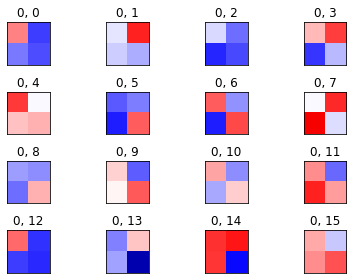

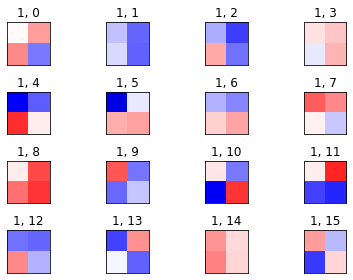

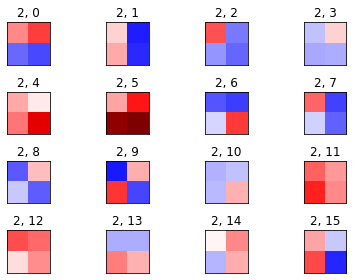

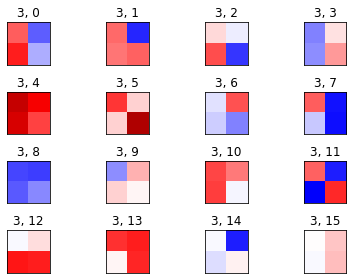

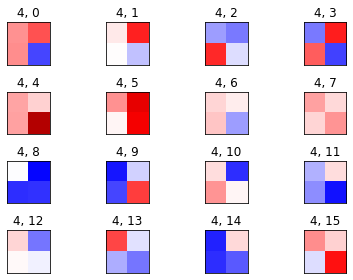

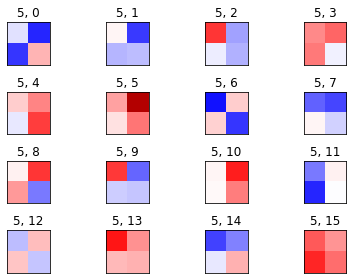

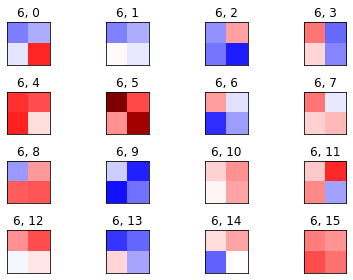

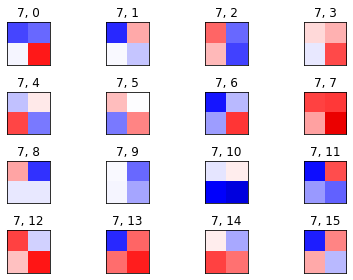

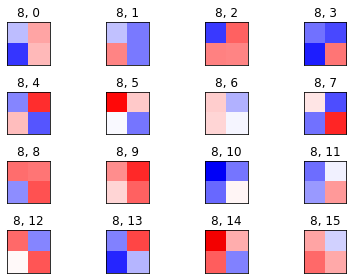

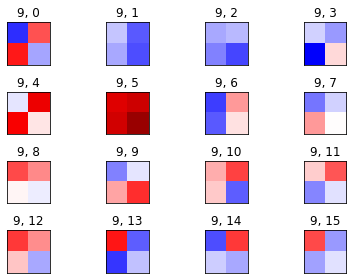

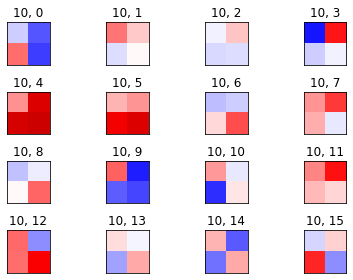

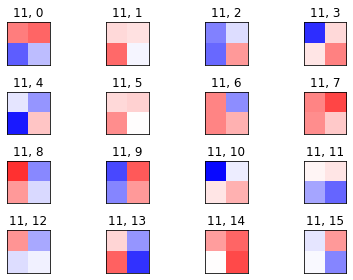

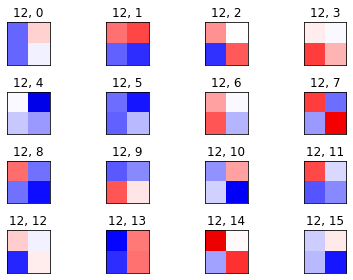

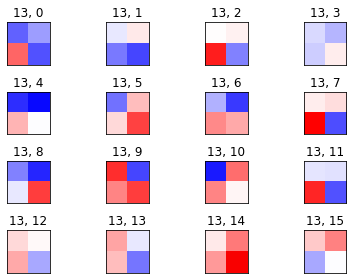

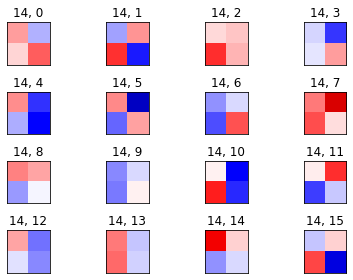

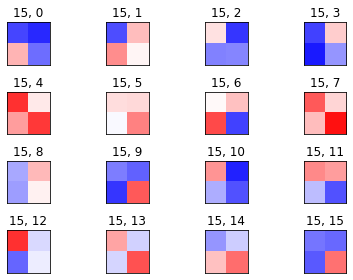

In [43]:
num_filters = conv_x2_kernel_np.shape[2]
channels = range(conv_x2_kernel_np.shape[2])
w_max = np.max(conv_x2_kernel_np)
w_min = np.min(conv_x2_kernel_np)

for channel in channels:
    # create figure and axes
    fig, axes = plt.subplots(4, 4)
    for idx, ax in enumerate(axes.flat):
        img = conv_x2_kernel_np[:, :, channel, idx]
        _ = ax.imshow(img, vmin=w_min, vmax=w_max, 
                      interpolation='nearest', cmap='seismic')
        _ = ax.set_xticks([])
        _ = ax.set_yticks([])
        _ = ax.set_title(f'{channel}, {idx}')
    fig.tight_layout()

In [ ]:

# iterate channels
for channel in channels:
    # iterate filters inside every channel
    for l, ax in enumerate(axes.flat):
        # get a single filter
        img = weights[:, :, channel, l]
        # put it on the grid
        ax.imshow(img, vmin=w_min, vmax=w_max, interpolation='nearest', cmap='seismic')
        # remove any labels from the axes
        ax.set_xticks([])
        ax.set_yticks([])
    # save figure
    plt.savefig(os.path.join(plot_dir, '{}-{}.png'.format(name, channel)), bbox_inches='tight')

[]

[]

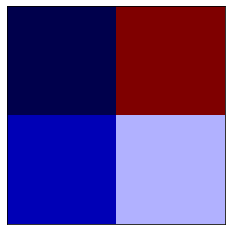

In [29]:
w0 = conv_x1_kernel_np[:, :, 0]
w_min = np.min(w0)
w_max = np.max(w0)

fig, ax = plt.subplots()
_ = ax.imshow(conv_x1_kernel_np[:, :, 0], vmin=w_min, vmax=w_max, 
          interpolation='nearest', cmap='seismic')
# remove any labels from the axes
_ = ax.set_xticks([])
_ = ax.set_yticks([])

In [ ]:
model.dynamics.position_fn.dense

In [39]:
import pickle

with open(model.files['parameters_pkl_file'], 'wb') as f:
    pickle.dump(model.params, f)

In [ ]:
model.sess.graph.collections

In [ ]:
model.sess.graph.get_collection

In [ ]:
model.dynamics.position_fn.summary()

In [ ]:
# Iterate over samples history and calculate observables for each sample.
# `lattice.calc_plaq_observables(samples)` calculates observables for each of
# the samples in the mini-batch.
actions_history = []
avg_plaquettes_history = []
top_charges_history = []
for idx, samples in enumerate(samples_history):
    t0 = time.time()
    observables = np.array(model.lattice.calc_plaq_observables(samples))
    actions, plaqs, charges = observables
    
    actions_history.append(actions)
    avg_plaquettes_history.append(plaqs)
    top_charges_history.append(charges)
    
    print(f'step: {idx}  '
          f'time / step: {time.time() - t0:^6.4g}  '
          f'avg action: {np.mean(actions):^6.4g}  '
          f'avg plaquette: {np.mean(plaqs):^6.4g} '
          f'top charge: {np.mean(charges):^6.4g}')

In [ ]:
_ = helpers.plot_run_data(model.data, 
                          model.params, 
                          model.steps_arr, 
                          model.figs_dir, 
                          skip_steps=1)

In [ ]:
#tf.reset_default_graph()
#model = GaugeModel(params=params,
#                   config=None,
#                   sess=None,
#                   conv_net=False,
#                   hmc=False,
#                   log_dir='../../gauge_logs_graph/run_25',
#                   restore=True)

In [ ]:
samples = np.random.randn(*model.samples.shape)
samples_history = []

In [ ]:
for i in range(500):
    t0 = time.time()
    samples = model.sess.run(model.x_out, feed_dict={model.x: samples})
    samples_history.append(samples)
    print(f'step: {i:^6.4g} time/step: {time.time() - t0:^6.4g}')

In [ ]:
samples_history_conv = np.array(samples_history_conv)
print(samples_history_conv.shape)

In [ ]:
import pickle
samples_history_file = os.path.join(model.info_dir, 'samples_history.pkl')
with open(samples_history_file, 'wb') as f:
    pickle.dump(samples_history_conv, f)